<a href="https://colab.research.google.com/github/davidkorea/google_colaboratory/blob/master/CH02_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def createdataset():
  group = np.array([[1, 1.1],[1,1],[0,0],[0, 1.1]])
  labels = ['A','A','B','B']
  return group, labels

In [0]:
group, labels = createdataset()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

0 1.0 1.1 A
1 1.0 1.0 A
2 0.0 0.0 B
3 0.0 1.1 B


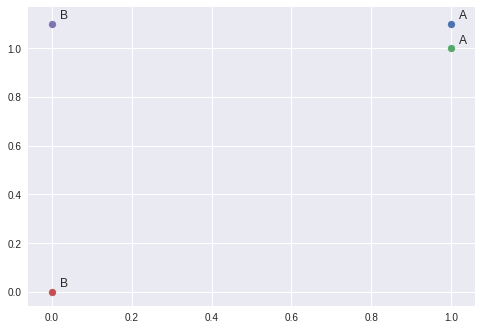

In [22]:
for i in range(group.shape[0]):
  print(i, group[i][0],group[i][1],labels[i])
  plt.scatter(group[i][0],group[i][1])
  plt.text(group[i][0]+0.02,group[i][1]+0.02,labels[i])

In [56]:
df = pd.DataFrame(group, columns=['x','y'])
df

,x,y
0,1.0,1.1
1,1.0,1.0
2,0.0,0.0
3,0.0,1.1


In [0]:
# df = pd.concat((df,pd.Series(labels)),axis=1)

In [58]:
df['label'] = pd.Series(labels)
df

,x,y,label
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,1.1,B


In [62]:
df['cate'] = df['label'].apply(lambda x:0 if x=='A' else 1)
df

,x,y,label,cate
0,1.0,1.1,A,0
1,1.0,1.0,A,0
2,0.0,0.0,B,1
3,0.0,1.1,B,1


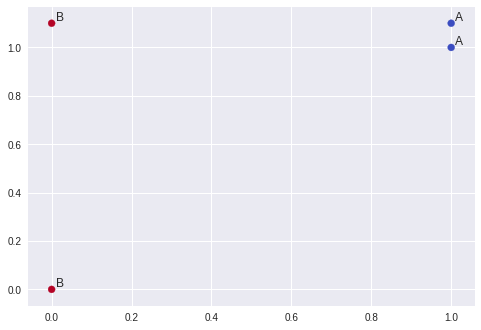

In [68]:
plt.scatter(df.x,df.y,c=df.cate, cmap='coolwarm') # str cannot be used as 'c' value
for i in range(df.shape[0]):
  plt.text(df.x[i]+0.01,df.y[i]+0.01,df.label[i])

## 2-1 KNN Algorithm

In [136]:
def classify0(inX, dataset, labels, k):
  dataset_row = dataset.shape[0]
  diff = np.tile(inX, (dataset_row,1)) - dataset # only copy row, cuz input vector has same dim as dataset
  # each sample in dataset will - input vector, so copy input as the shape of dataset  
  sqdiff = diff**2
  sum_sqdiff = sqdiff.sum(axis=1) # sqdiff.sum() add all elements in matrix
  distance = sum_sqdiff**0.5
  sort_distance_idx = distance.argsort() # can not use sorted(distance) 
  vote_label = {}
  for i in range(k):
    label = labels[ sort_distance_idx[i] ]    
    vote_label[label] = vote_label.get(label,0)+1
#     print(label)
  sort_vote_label = sorted(vote_label.items(), key=lambda x : x[1], reverse=True)
#   print(vote_label,sort_vote_label)
#   print(sqdiff, '\n', sum_sqdiff, '\n',sqdiff.sum(), '\n',distance)
#   print(sort_distance_idx,)

  return sort_vote_label[0][0]


classify0([0,0], group, labels, 3)

'B'

- **np.tile()**

In [135]:
np.tile(['a','b'],(2,2))

array([['a', 'b', 'a', 'b'],
       ['a', 'b', 'a', 'b']], dtype='<U1')

- **dict.get()**

In [0]:
a = {'x':1,'y':2}

In [119]:
a.get('z',0)

0

In [122]:
a['z'] = a.get('z',0)
a

{'x': 1, 'y': 2, 'z': 0}